In [18]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import plotly.colors as co
import seaborn as sns
pio.templates.default ="plotly_white"

In [23]:
df=pd.read_csv("Sample - Superstore.csv")

In [12]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [15]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

#  converting date Formate 

In [26]:
df['Order Date']= pd.to_datetime(df['Order Date'],errors='coerce')

In [28]:
df['Ship Date']= pd.to_datetime(df['Ship Date'],errors='coerce')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     4042 non-null   datetime64[ns]
 3   Ship Date      3898 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Creating a columns

In [43]:
df["Order Month"]=df["Order Date"].dt.month
df["Order Year"] = df["Order Date"].dt.year
df["Order Day Of Week"]= df["Order Date"].dt.dayofweek

In [32]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day Of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11.0,2016.0,1.0


# Monthly Sales Analysis

In [44]:
Sales_by_month=df.groupby("Order Month")["Sales"].sum().reset_index()
Sales_by_month

,Order Month,Sales
0,1.0,29365.8146
1,2.0,32169.0160
2,3.0,57260.7674
3,4.0,58893.2035
4,5.0,53129.0038
5,6.0,61142.0400
6,7.0,48621.8990
7,8.0,50657.6457
8,9.0,125243.0076
9,10.0,78960.4915


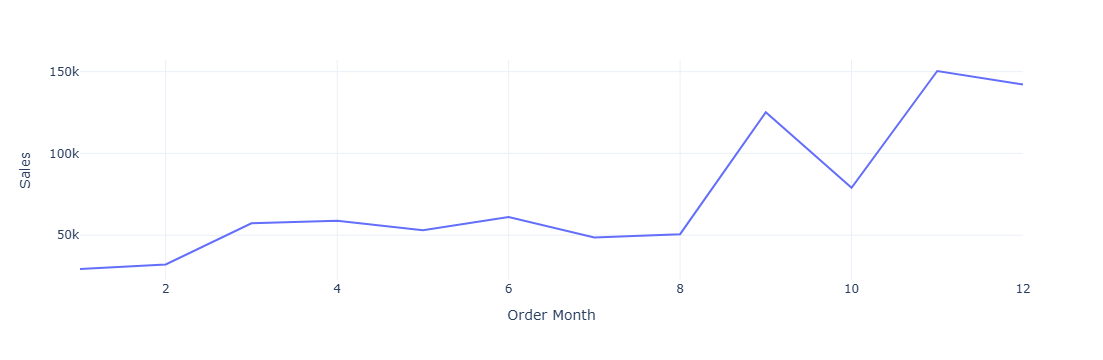

In [45]:
px.line(Sales_by_month,x="Order Month",y="Sales")

# Sales_by_Category

In [46]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Year', 'Order Day Of Week'],
      dtype='object')

In [48]:
Sales_by_Category=df.groupby("Category")["Sales"].sum().reset_index()
Sales_by_Category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


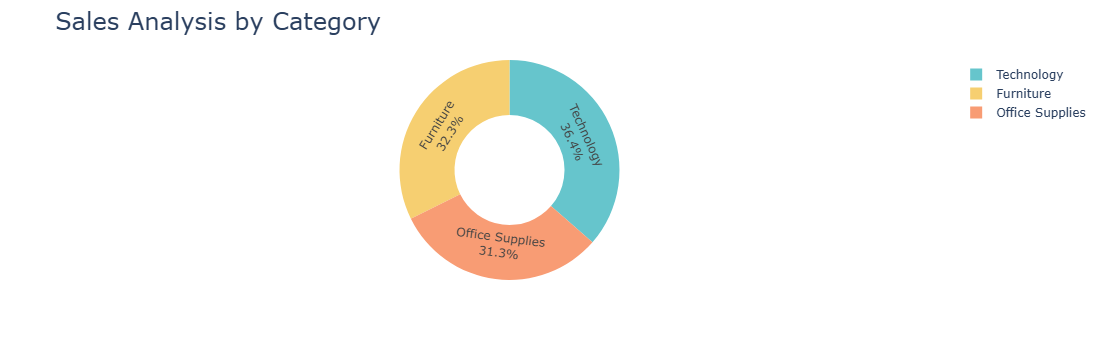

In [63]:
fig=px.pie(Sales_by_Category,
            values="Sales",
            names="Category",
            hole=0.5,
           color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition="inside",textinfo="percent+label")
fig.update_layout(title_text="Sales Analysis by Category",title_font=dict(size=24))
fig.show()

# Sales Analysis By Category

In [65]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Year', 'Order Day Of Week'],
      dtype='object')

In [67]:
Sales_by_Sub_Category=df.groupby("Sub-Category")["Sales"].sum().reset_index()
Sales_by_Sub_Category

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


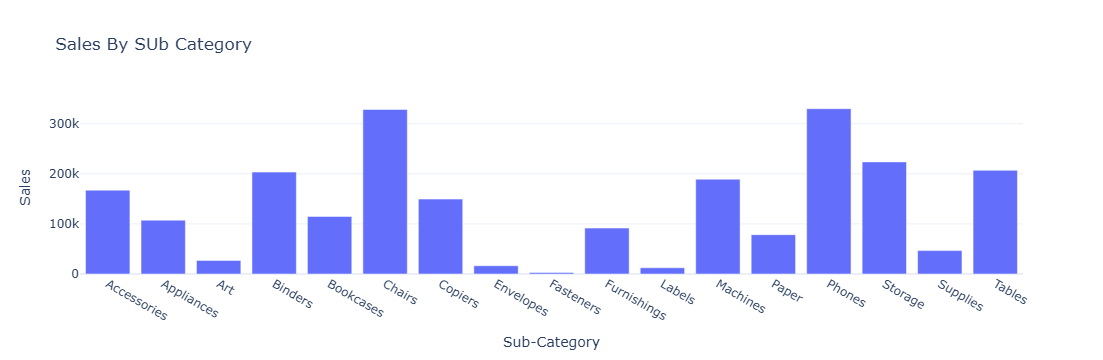

In [68]:
fig=px.bar(Sales_by_Sub_Category,x="Sub-Category",y="Sales",title="Sales By SUb Category")
fig.show()

# Montly Profit Analysis

In [69]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day Of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11.0,2016.0,1.0


In [71]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Year', 'Order Day Of Week'],
      dtype='object')

In [73]:
profit_by_month=df.groupby("Order Month")["Profit"].sum().reset_index()
profit_by_month

,Order Month,Profit
0,1.0,974.1194
1,2.0,5982.0537
2,3.0,6348.6212
3,4.0,6193.8767
4,5.0,5675.1911
5,6.0,7610.5916
6,7.0,7597.1060
7,8.0,9045.1213
8,9.0,12219.7607
9,10.0,14762.4068


In [74]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Year', 'Order Day Of Week'],
      dtype='object')

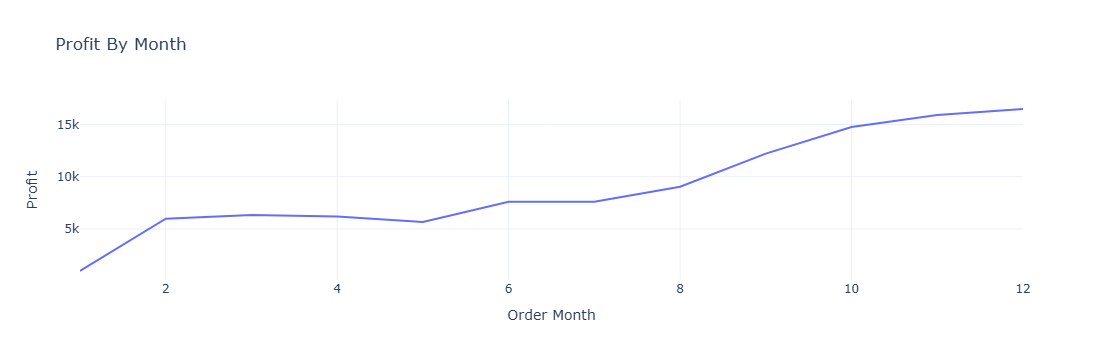

In [76]:
fig=px.line(profit_by_month,x="Order Month", y="Profit",title="Profit By Month")
fig.show()

# Profit by Category

In [78]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Year', 'Order Day Of Week'],
      dtype='object')

In [80]:
profit_by_category=df.groupby("Category")["Profit"].sum().reset_index()
profit_by_category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


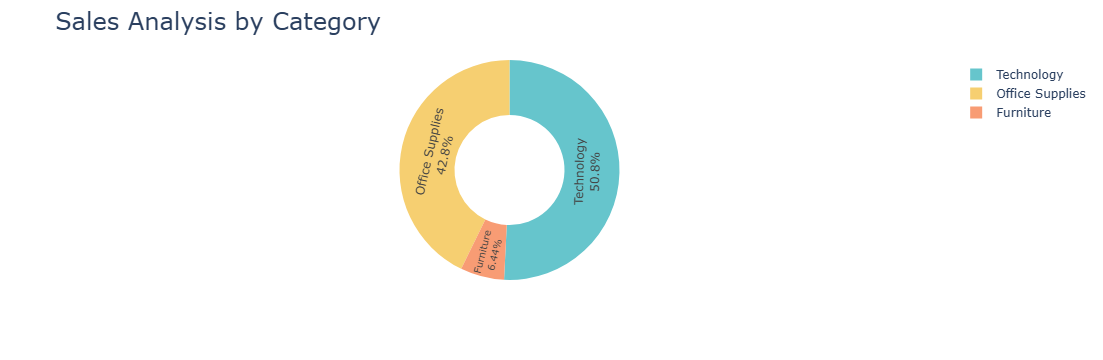

In [82]:
fig=px.pie(profit_by_category,
            values="Profit",
            names="Category",
            hole=0.5,
           color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition="inside",textinfo="percent+label")
fig.update_layout(title_text="Sales Analysis by Category",title_font=dict(size=24))
fig.show()

# Profit by Sub-Category

In [91]:
Profit_by_Sub_Category=df.groupby("Sub-Category")["Profit"].sum().reset_index()
Profit_by_Sub_Category

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


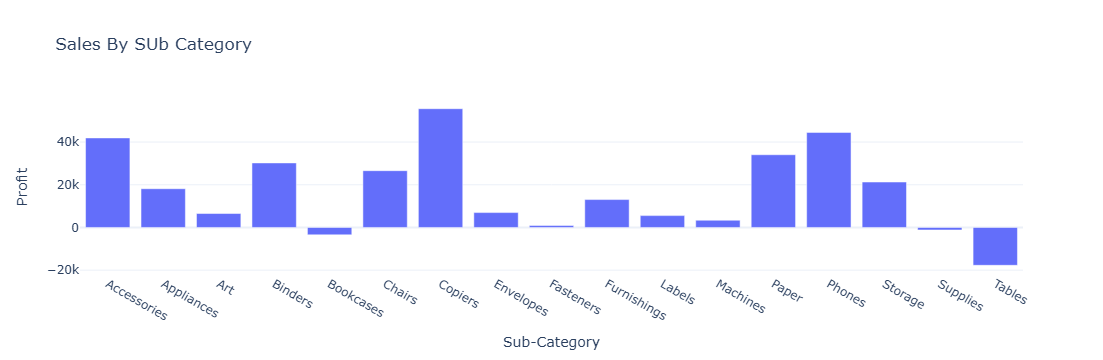

In [90]:
fig=px.bar(Profit_by_Sub_Category,x="Sub-Category",y="Profit",title="Sales By SUb Category")
fig.show()

# Sales And Profit -- Customer Segments

In [93]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Year', 'Order Day Of Week'],
      dtype='object')

In [99]:
sales_profit_by_Segment=df.groupby("Segment").agg({"Sales":"sum","Profit":"sum"}).reset_index()
color_palette= px.colors.qualitative.Pastel
fig=go.Figure()
fig.add_trace(go.bar(x=sales_profit_by_Segment["segment"],y=sales_profit_by_Segment["Sales"],name="Sales",marker_color=color_paletter[0]))

fig.add_trace(go.bar(x=sales_profit_by_Segment["segment"],y=sales_profit_by_Segment["Profit"],name="Profit",marker_color=color_paletter[0]))

fig.update_layout(title="Sales and Profit by Segments",xaxis_title="Customer Segments",yaxis_title="Amount")
fig.show()


KeyError: 'segment'

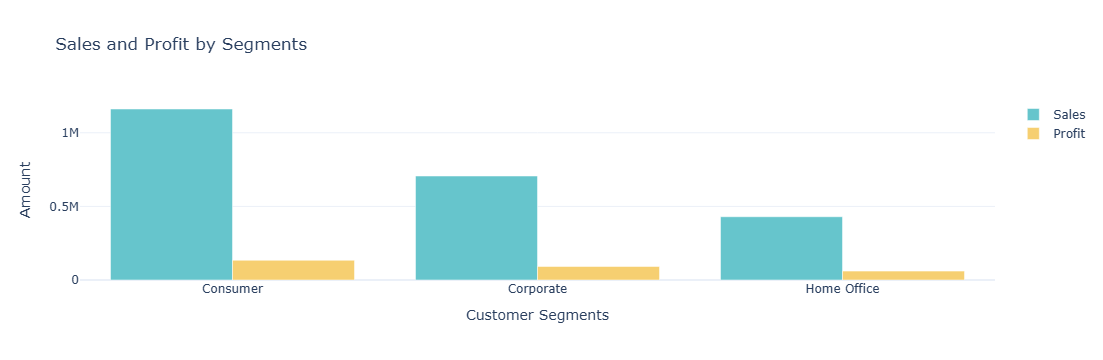

In [98]:
sales_profit_by_Segment = df.groupby("Segment").agg({"Sales": "sum", "Profit": "sum"}).reset_index()

# Defining color palette
color_palette = px.colors.qualitative.Pastel

# Creating figure
fig = go.Figure()

# Adding Sales trace
fig.add_trace(go.Bar(
    x=sales_profit_by_Segment["Segment"], 
    y=sales_profit_by_Segment["Sales"], 
    name="Sales", 
    marker=dict(color=color_palette[0])  # Corrected marker syntax
))

# Adding Profit trace
fig.add_trace(go.Bar(
    x=sales_profit_by_Segment["Segment"], 
    y=sales_profit_by_Segment["Profit"], 
    name="Profit", 
    marker=dict(color=color_palette[1])  # Using a different color for distinction
))

# Updating layout
fig.update_layout(
    title="Sales and Profit by Segments",
    xaxis_title="Customer Segments",
    yaxis_title="Amount",
    barmode="group"  # To place bars side by side
)

# Showing the plot
fig.show()

# Analysis Sales To Profit Ratio

In [100]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Year', 'Order Day Of Week'],
      dtype='object')

In [104]:
sales_profit_by_Segment = df.groupby("Segment").agg({"Sales": "sum", "Profit": "sum"}).reset_index()
sales_profit_by_Segment["Sales_to_Profit_Ratio"]=sales_profit_by_Segment["Sales"]/sales_profit_by_Segment["Profit"]
print(sales_profit_by_Segment[["Segment","Sales_to_Profit_Ratio"]])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
